# **PyTorch Activation Functions**

Activation functions are essential in neural networks because they introduce **non-linearity**, allowing the model to learn complex patterns beyond simple linear mappings.

Without activation functions, a stack of linear layers would collapse into a single linear transformation.

---

## **1. What is an Activation Function?**

An **activation function** maps the weighted sum of neuron inputs (pre-activation value) to an output that is passed to the next layer.

If $z = w^T x + b$,
then the neuron output is:

$$
a = f(z)
$$

where $f$ is the **activation function**.

---

## **2. PyTorch Built-in Activation Functions**

PyTorch implements them in `torch.nn` and `torch.nn.functional`.

### Two ways to use them:

```python
import torch
import torch.nn as nn
import torch.nn.functional as F

# Option 1: Module
relu = nn.ReLU()

# Option 2: Functional
output = F.relu(x)
```

Both are valid.

* **`nn.Module` version** is preferred inside model classes.
* **Functional version (`F.xxx`)** is used for inline operations in `forward()`.

---

## **3. Common Activation Functions**

Let’s go through them **one by one**, with equations, graphs, code, and when to use them.

---

### **3.1 ReLU (Rectified Linear Unit)** ✅

**Equation:**
$$
f(x) = \max(0, x)
$$

**Derivative:**
$$
f'(x) =
\begin{cases}
1 & \text{if } x > 0 \
0 & \text{if } x \le 0
\end{cases}
$$

**PyTorch:**

```python
x = torch.tensor([-2.0, -1.0, 0.0, 2.0])
relu = nn.ReLU()
print(relu(x))  # tensor([0., 0., 0., 2.])
```

**Pros:**

* Very fast and simple.
* Avoids vanishing gradient (for positive inputs).

**Cons:**

* **Dead ReLU problem**: Neurons can “die” if they only see negative inputs → gradient becomes zero.

**When to use:**

* Default for most feedforward, CNNs, and transformers.
* Works well in most cases.

---

### **3.2 Leaky ReLU**

**Equation:**
$$
f(x) =
\begin{cases}
x & x > 0 \
\alpha x & x \le 0
\end{cases}
$$

with $\alpha$ typically $= 0.01$.

**PyTorch:**

```python
x = torch.tensor([-2.0, -1.0, 0.0, 2.0])
leaky = nn.LeakyReLU(negative_slope=0.1)
print(leaky(x))
```

**Pros:**

* Fixes “dead ReLU” by allowing small gradient when $x < 0$.

**Cons:**

* Slight computational overhead.

**When to use:**

* When training is unstable with ReLU.
* Often used in **GANs** (especially the discriminator).

---

### **3.3 Parametric ReLU (PReLU)**

**Equation:**
$$
f(x) =
\begin{cases}
x & x > 0 \
a x & x \le 0
\end{cases}
$$

where $a$ is **learnable**.

**PyTorch:**

```python
prelu = nn.PReLU()
output = prelu(x)
```

**When to use:**

* When you want the model to learn the best negative slope instead of fixing it.
* Sometimes used in **ResNets** or advanced CNNs.

---

### **3.4 ELU (Exponential Linear Unit)**

**Equation:**
$$
f(x) =
\begin{cases}
x & x > 0 \
\alpha (e^x - 1) & x \le 0
\end{cases}
$$

**PyTorch:**

```python
elu = nn.ELU(alpha=1.0)
print(elu(x))
```

**Pros:**

* Smooth and continuous.
* Can help gradients flow better than ReLU.
* Output mean closer to zero.

**Cons:**

* Slightly slower (uses exponential).

**When to use:**

* For networks sensitive to mean shifts (e.g., RNNs).
* When ReLU causes slow convergence.

---

### **3.5 SELU (Scaled ELU)**

**Equation:**
$$
f(x) = \lambda
\begin{cases}
x & x > 0 \
\alpha (e^x - 1) & x \le 0
\end{cases}
$$

with $\lambda = 1.0507$, $\alpha = 1.6733$.

**PyTorch:**

```python
selu = nn.SELU()
print(selu(x))
```

**When to use:**

* In **Self-Normalizing Networks (SNNs)**.
* Must be used with **LeCun Normal initialization** and **no BatchNorm**.

---

### **3.6 GELU (Gaussian Error Linear Unit)** ✅ (Used in Transformers)

**Equation:**
$$
f(x) = x \Phi(x)
$$

where $\Phi(x)$ is the standard Gaussian CDF.

Approximation used:
$$
f(x) = 0.5x(1 + \tanh(\sqrt{2/\pi}(x + 0.044715x^3)))
$$

**PyTorch:**

```python
gelu = nn.GELU()
print(gelu(x))
```

**Pros:**

* Smooth and probabilistic.
* Keeps small negative values (unlike ReLU).

**When to use:**

* Default in **Transformers**, **BERT**, **Vision Transformers (ViT)**.
* Works well for large models and normalized inputs.

---

### **3.7 Sigmoid**

**Equation:**
$$
f(x) = \frac{1}{1 + e^{-x}}
$$

**Derivative:**
$$
f'(x) = f(x)(1 - f(x))
$$

**PyTorch:**

```python
sigmoid = nn.Sigmoid()
print(sigmoid(x))
```

**Pros:**

* Maps outputs to (0, 1), interpretable as probability.

**Cons:**

* Saturates for large |x| → **vanishing gradients**.
* Output not zero-centered.

**When to use:**

* **Output layer** for binary classification.
* Not recommended for hidden layers.

---

### **3.8 Tanh (Hyperbolic Tangent)**

**Equation:**
$$
f(x) = \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$

**Range:** (-1, 1)

**PyTorch:**

```python
tanh = nn.Tanh()
print(tanh(x))
```

**Pros:**

* Zero-centered.
* Works better than sigmoid for hidden layers.

**Cons:**

* Still suffers from **vanishing gradients** for large |x|.

**When to use:**

* RNNs (classical ones).
* Simple models where zero-centered output helps.

---

### **3.9 Softmax**

**Equation:**
$$
f_i(x) = \frac{e^{x_i}}{\sum_j e^{x_j}}
$$

**PyTorch:**

```python
x = torch.tensor([[1.0, 2.0, 3.0]])
softmax = nn.Softmax(dim=1)
print(softmax(x))  # tensor([[0.09, 0.24, 0.66]])
```

**When to use:**

* **Output layer** for **multi-class classification**.

---

### **3.10 Swish (Self-Gated)**

**Equation:**
$$
f(x) = x \cdot \sigma(x)
$$

**PyTorch:**

```python
swish = x * torch.sigmoid(x)
```

**Pros:**

* Smooth like GELU.
* Works better in some CNNs and deep networks.

**When to use:**

* When GELU is unavailable or for experimentation.

---

## **4. Activation Function Comparison Table**

| Function       | Range   | Smooth | Gradient issues     | Typical use          |
| -------------- | ------- | ------ | ------------------- | -------------------- |
| **ReLU**       | [0, ∞)  | No     | Dead neurons        | CNNs, MLPs           |
| **Leaky ReLU** | (-∞, ∞) | No     | Small neg. slope    | GANs, CNNs           |
| **PReLU**      | (-∞, ∞) | No     | Learnable slope     | Advanced CNNs        |
| **ELU**        | (-α, ∞) | Yes    | None                | Deep networks        |
| **SELU**       | (-∞, ∞) | Yes    | Requires LeCun init | SNNs                 |
| **GELU**       | (-∞, ∞) | Yes    | None                | Transformers         |
| **Sigmoid**    | (0, 1)  | Yes    | Vanishing           | Output (binary)      |
| **Tanh**       | (-1, 1) | Yes    | Vanishing           | RNNs                 |
| **Softmax**    | (0, 1)  | Yes    | None                | Output (multi-class) |
| **Swish**      | (-∞, ∞) | Yes    | None                | Modern CNNs          |

---

## **5. Practical Guidelines**

1. **Start with ReLU** for general use.
2. **Use LeakyReLU or PReLU** if you notice many dead neurons.
3. **Use GELU** for Transformer-like architectures.
4. **Use Sigmoid / Softmax** only in the **output layer**.
5. **Use Tanh** for **RNNs** (simple architectures).
6. **Avoid Sigmoid/Tanh** in deep hidden layers — they cause vanishing gradients.
7. **SELU + LeCun init** for self-normalizing networks (rarely used today).
8. **Swish** is a good modern choice if GELU not available.

---

## **6. Example: Comparing Activations in Code**



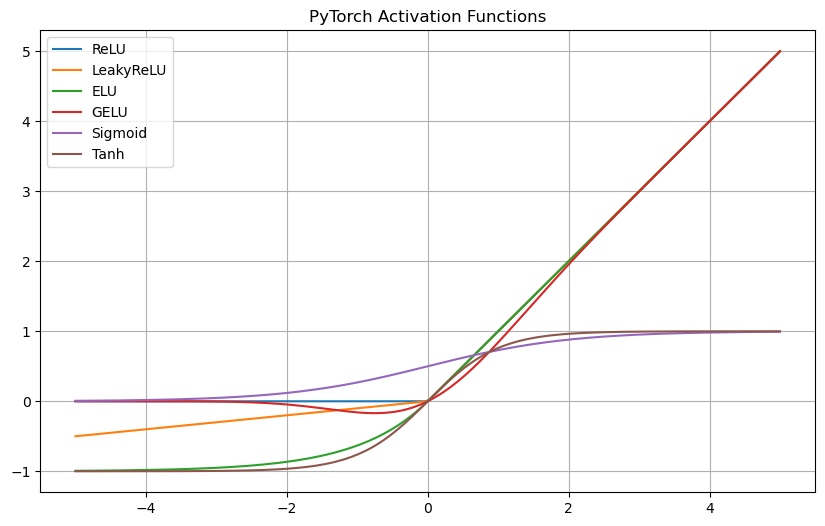

In [3]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

x = torch.linspace(-5, 5, 200)

activations = {
    "ReLU": nn.ReLU(),
    "LeakyReLU": nn.LeakyReLU(0.1),
    "ELU": nn.ELU(),
    "GELU": nn.GELU(),
    "Sigmoid": nn.Sigmoid(),
    "Tanh": nn.Tanh(),
}

plt.figure(figsize=(10, 6))
for name, act in activations.items():
    y = act(x)
    plt.plot(x, y, label=name)

plt.legend()
plt.title("PyTorch Activation Functions")
plt.grid(True)
plt.show()


---

## **7. Summary**

* Activation functions add **non-linearity**.
* Different functions affect **training stability, gradient flow**, and **convergence**.
* The **choice depends on architecture** (CNN, RNN, Transformer) and **empirical results**.
